In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
import tqdm

# Read the data

In [20]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv', index_col='Id')

## Check the X_train

In [4]:
X_train.describe()

,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,HES4,ISG15,C1orf159,TNFRSF18,TNFRSF4,...,MT-ND2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1,AC007325.4
count,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,...,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000
mean,0.023517,0.036872,0.004369,0.003122,0.067530,0.006910,0.162686,0.009218,0.022815,0.025265,...,2.664551,0.496871,3.749340,3.604431,3.054073,2.121396,0.389333,3.168100,0.011626,0.002370
std,0.142836,0.201239,0.062652,0.049605,0.242969,0.082023,0.404015,0.097047,0.167327,0.171362,...,0.767727,0.592482,0.533526,0.534581,0.622542,0.742646,0.567115,0.601833,0.103098,0.042392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.310162,0.000000,3.450217,3.317771,2.747712,1.776922,0.000000,2.858074,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.775880,0.000000,3.763626,3.608236,3.103577,2.208911,0.000000,3.191889,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.172121,0.979686,4.063782,3.890643,3.422642,2.597766,0.785522,3.532340,0.000000,0.000000
max,1.621535,3.093561,1.509521,1.210957,2.733353,1.786157,3.703712,2.353896,2.305110,2.201210,...,5.539158,3.576117,6.775901,6.468011,6.217141,4.789797,3.262960,6.180847,2.809310,1.654303


In [7]:
non_numerical_columns = X_train.select_dtypes(exclude=['number']).columns

non_numerical_columns

Index([], dtype='object')

In [10]:
X_train.isna().sum().sort_values()

LINC01409     0
AREL1         0
LTBP2         0
ISCA2         0
NPC2          0
             ..
CCDC167       0
ZFAND3        0
BTBD9         0
PIM1          0
AC007325.4    0
Length: 9000, dtype: int64

## Check X_test

In [11]:
X_train.describe()

,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,HES4,ISG15,C1orf159,TNFRSF18,TNFRSF4,...,MT-ND2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1,AC007325.4
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,...,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.023373,0.028112,0.001337,0.005652,0.070874,0.005383,0.164936,0.014961,0.023498,0.024085,...,2.660448,0.487837,3.737405,3.586841,3.010478,2.122606,0.427953,3.127487,0.011306,0.000270
std,0.146990,0.154522,0.024946,0.076890,0.244445,0.071868,0.396965,0.111593,0.173599,0.164363,...,0.758260,0.593979,0.528841,0.505309,0.646951,0.722664,0.605145,0.641449,0.096724,0.006980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.966939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.353531,0.000000,3.422418,3.292453,2.731755,1.784906,0.000000,2.811669,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.765818,0.000000,3.763024,3.597978,3.071967,2.180394,0.000000,3.172384,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.152672,0.995067,4.070581,3.874712,3.407504,2.596375,0.865635,3.506826,0.000000,0.000000
max,1.335855,1.673640,0.538652,1.422230,1.759759,1.218633,2.288928,1.092334,1.755478,1.674731,...,4.754087,2.996078,5.220854,5.505274,4.796762,4.533095,3.262960,4.564126,1.247872,0.180681


In [12]:
non_numerical_columns = X_test.select_dtypes(exclude=['number']).columns

non_numerical_columns

Index([], dtype='object')

In [13]:
X_test.isna().sum().sort_values()

LINC01409     0
AREL1         0
LTBP2         0
ISCA2         0
NPC2          0
             ..
CCDC167       0
ZFAND3        0
BTBD9         0
PIM1          0
AC007325.4    0
Length: 9000, dtype: int64

## Check y_train

In [14]:
y_train.describe()

,Id,Expected
count,3794.000000,3794.000000
mean,1896.500000,0.791096
std,1095.377789,0.860856
min,0.000000,0.000000
25%,948.250000,0.000000
50%,1896.500000,0.311748
75%,2844.750000,1.662514
max,3793.000000,2.860416


In [15]:
len(X_train) == len(y_train)

True

In [16]:
y_train.isna().sum()

Id          0
Expected    0
dtype: int64

In [27]:
y_desc = y_train.describe()
y_desc.loc['non-zero'] = (y_train != 0).mean()
y_desc.loc['median'] = y_train.median()
y_desc

,Expected
count,3794.000000
mean,0.791096
std,0.860856
min,0.000000
25%,0.000000
50%,0.311748
75%,1.662514
max,2.860416
non-zero,0.598577
median,0.311748


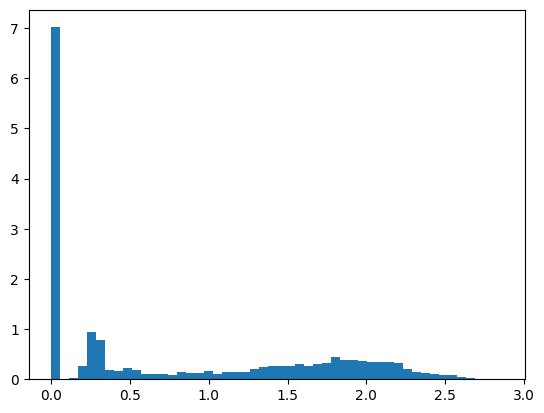

In [23]:
plt.hist(y_train, bins=50, density=True);

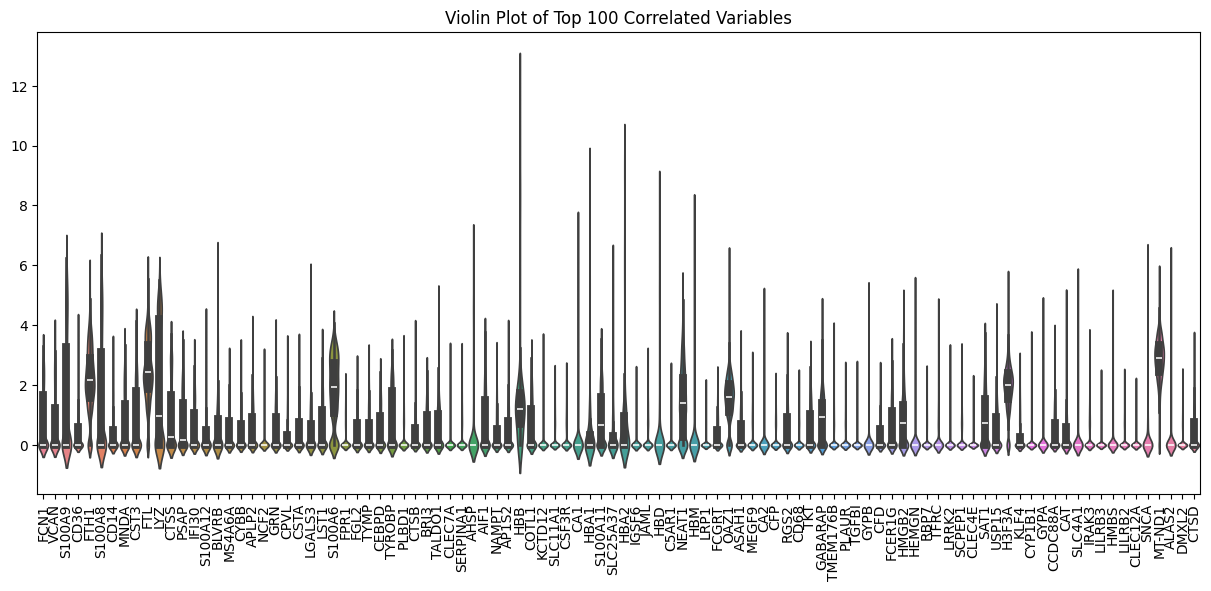

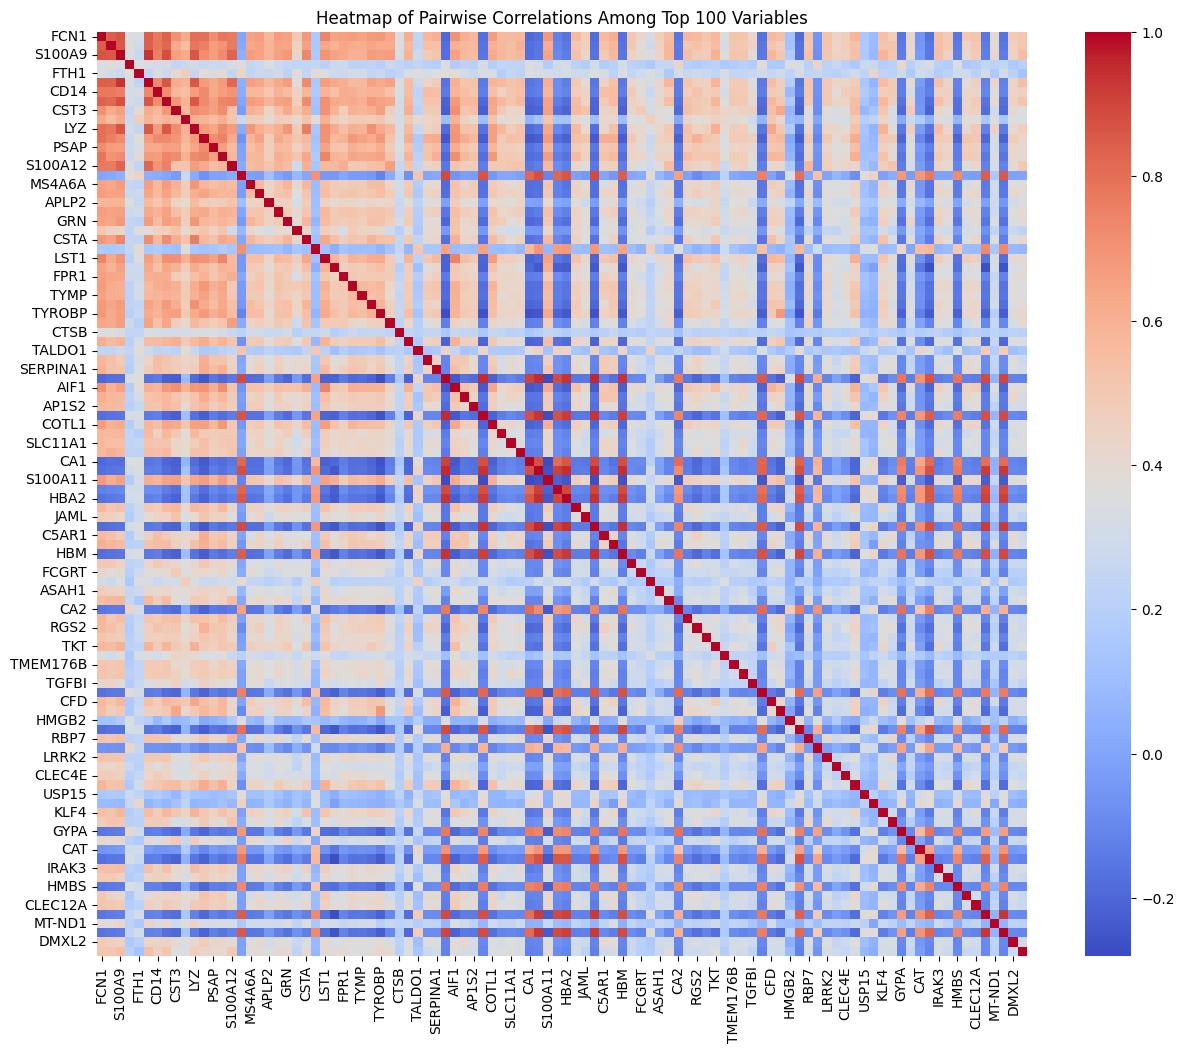

In [ ]:
y_train_values = y_train['Expected']
correlations = X_train.apply(lambda col: np.corrcoef(col, y_train_values)[0, 1])

correlation_df = pd.DataFrame({"Variable": X_train.columns, "Correlation": correlations})

most_correlated = correlation_df.nlargest(100, "Correlation")
selected_variables = most_correlated["Variable"]

X_train_top_100 = X_train[selected_variables]

plt.figure(figsize=(15, 6))
sns.violinplot(data=X_train_top_100)
plt.title("Violin Plot of Top 100 Correlated Variables")
plt.xticks(rotation=90)
plt.show()

pairwise_correlations = X_train_top_100.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(pairwise_correlations, cmap="coolwarm", annot=False)
plt.title("Heatmap of Pairwise Correlations Among Top 100 Variables")
plt.show()


# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  
    'l1_ratio': [0.0, 0.5, 1.0]  
}

elastic_net = ElasticNet(max_iter=10000, random_state=42)

cv_folds = 5 

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=cv_folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train['Expected'])

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

cv_results = grid_search.cv_results_
mean_train_error = -np.mean(cv_results['mean_train_score'])
mean_val_error = -np.mean(cv_results['mean_test_score'])

print(f"Average Training Error: {mean_train_error}")
print(f"Average Validation Error: {mean_val_error}")

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

# Initialize Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=random_forest, param_grid=rf_param_grid, cv=cv_folds, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train['Expected'])

# Best hyperparameters for Random Forest
rf_best_params = rf_grid_search.best_params_
print(f"Best Random Forest Hyperparameters: {rf_best_params}")

# Training and validation errors for Random Forest
rf_cv_results = rf_grid_search.cv_results_
rf_mean_train_error = -np.mean(rf_cv_results['mean_train_score'])
rf_mean_val_error = -np.mean(rf_cv_results['mean_test_score'])

# Baseline Model
baseline_prediction = np.mean(y_train['Expected'])
baseline_error = mean_squared_error(y_train['Expected'], [baseline_prediction] * len(y_train))

# Tabular Summary
summary_df = pd.DataFrame([
    {
        "Model": "ElasticNet",
        "Best Hyperparameters": best_params,
        "Average Training Error": mean_train_error,
        "Average Validation Error": mean_val_error
    },
    {
        "Model": "Random Forest",
        "Best Hyperparameters": rf_best_params,
        "Average Training Error": rf_mean_train_error,
        "Average Validation Error": rf_mean_val_error
    },
    {
        "Model": "Baseline",
        "Best Hyperparameters": "N/A",
        "Average Training Error": baseline_error,
        "Average Validation Error": baseline_error
    }
])

print(summary_df)
